In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib widget
# %matplotlib inline

DATAFILE = "data/Asynchron_data_in.dat"
df = pd.read_csv(DATAFILE, sep=" ")
t = df["time"].values
y_s = df["position"].values
y_a = df["acceleration"].values

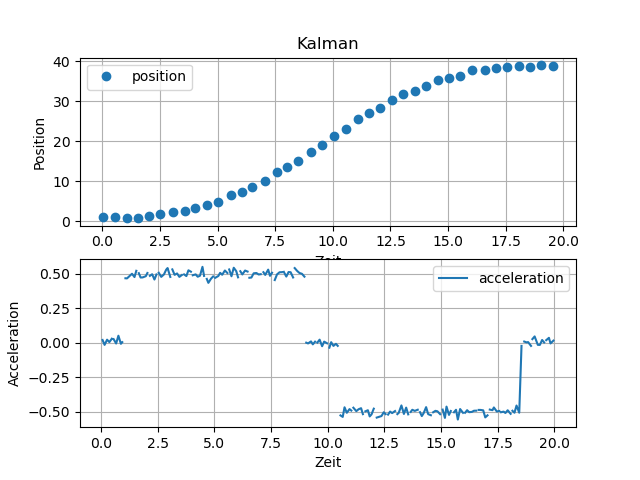

In [9]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title("Kalman")
plt.xlabel("Zeit")
plt.ylabel("Position")
plt.grid(True)
plt.plot(t, y_S, "o", label="position")
# plt.plot(t, s, label="prediction")
plt.legend()

plt.subplot(2, 1, 2)
# plt.plot(t, v, label="variation")
plt.plot(t, y_a, "-", label="acceleration")
plt.xlabel("Zeit")
plt.ylabel("Acceleration")
plt.grid(True)
plt.legend()
plt.show()


In [10]:
# Define system matrices
Bd = np.array(
    [
        [0],
        [0],
        [0],
    ]
)
C_p = np.array([1, 0, 0])  # C matrix during position value
C_a = np.array([0, 0, 1])  # C matrix during acceleration value
D = np.array([0])

# Initialization
x_dach = np.array(
    [
        [y_s[0]],
        [0],
        [0],
    ]
)  # estimate
P_dach = 50 * np.eye(len(Bd))
d_y = np.zeros(len(y))  # new error
y_dach = np.zeros(len(y))  # error
s = np.zeros(len(y))  # prediction output array
s_dach = np.zeros(len(y))
v = np.zeros(len(y))  # variation
u = np.zeros(len(y))
x_tilde = np.zeros((3, 1))  # 3 rows, 1 column
P_tilde = np.zeros((3, 3))  # 3 rows, 3 columns

# P_tilde0 = np.zeros(len(y))
# P_tilde1 = np.zeros(len(y))
# P_tilde2 = np.zeros(len(y))
# P_tilde3 = np.zeros(len(y))


In [11]:
R = np.array([10])  # ToDo: calculate
Q = np.array([0.00016667])


In [12]:
for k in range(0, len(t) - 1, 1):
    Ts = t[k + 1] - t[k]
    Ad = np.array(
        [
            [1, Ts, 0.5 * Ts**2],
            [0, 1, Ts],
            [0, 0, 1],
        ]
    )
    Gd = np.array(
        [
            [0.5 * Ts**2],
            [Ts],
            [1],
        ]
    )

    x_dach = Ad @ x_tilde + Bd * u[k]
    P_dach = Ad @ P_tilde @ Ad.T + Gd @ Q * Gd.T

    # print(x_dach)

    if str(y[k]) != "nan":
        C = C_p
        y_dach[k] = C @ x_dach + D * u[k]
        d_y[k] = y[k] - y_dach[k]
    else:
        C = C_a
        y_dach[k] = C @ x_dach + D * u[k]
        d_y[k] = a[k] - y_dach[k]

    K_temp = C @ P_dach @ C.reshape(-1, 1) + R
    if K_temp.ndim >= 2:
        K = P_dach @ C.reshape(-1, 1) * np.linalg.pinv(K_temp)
    else:
        K = P_dach @ C.reshape(-1, 1) / K_temp

    x_tilde = x_dach + (K * d_y[k]).reshape(-1, 1)
    P_tilde = (np.eye(len(Bd)) - K * C) @ P_dach
    # print(x_dach)

    s[k] = x_tilde[0]
    v[k] = x_tilde[1]
    s_dach[k] = x_dach[0]

    # P_tilde0 = P_tilde[0][0]
    # P_tilde1 = P_tilde[0][1]
    # P_tilde2 = P_tilde[1][0]
    # P_tilde3 = P_tilde[1][1]


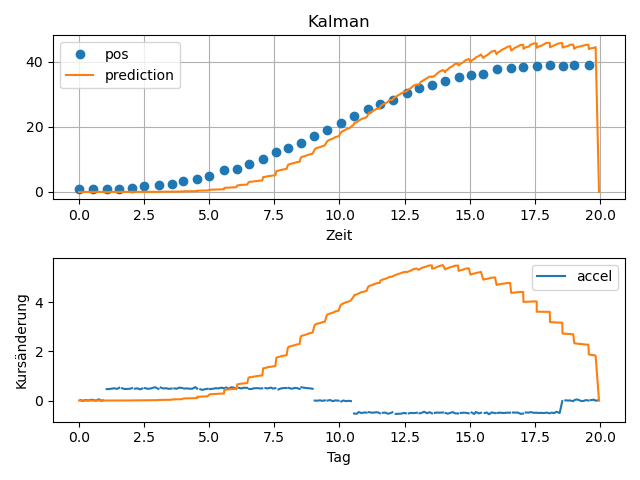

In [13]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title("Kalman")
plt.xlabel("Zeit")
plt.grid(True)
plt.plot(t, y, "o", label="pos")
# plt.plot(t, a, label="accel")
plt.plot(t, s, "-", label="prediction")
plt.legend()

plt.subplot(2, 1, 2)
# plt.plot(t, v, "-", label="variation")
plt.plot(t, a, "-", label="accel")
# plt.plot(t, a, label="accel")
plt.plot(t, v, "-", label="")
plt.xlabel("Tag")
plt.ylabel("Kursänderung")
plt.legend()
plt.tight_layout()
plt.show()
